14 columns are present in this dataset
age: The age of the patient.

sex: The gender of the patient (0 = female, 1 = male).

cp: Chest pain type experienced by the patient, categorized into four types:
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic

trestbps: Resting blood pressure (in mm Hg) measured on admission to the hospital.

chol: Serum cholesterol level (in mg/dl).

fbs: Fasting blood sugar (> 120 mg/dl), indicating whether the patient's fasting blood sugar is elevated:
0: False (blood sugar ≤ 120 mg/dl)
1: True (blood sugar > 120 mg/dl)

restecg: Resting electrocardiographic results, categorized into three types:
0: Normal
1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: Maximum heart rate achieved.

exang: Exercise-induced angina (0 = no, 1 = yes).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment, categorized into three types:
0: Upsloping
1: Flat
2: Downsloping

ca: Number of major vessels (0-3) colored by fluoroscopy.

thal: Thalassemia, a blood disorder:
0: Normal
1: Fixed defect
2: Reversible defect

target: The presence of heart disease:
0: No heart disease
1: Heart disease

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
heart_dataset = pd.read_csv(r"C:\Users\Stemy\Desktop\disease prediction\Disease_Prediction\dataset\heart.csv")

In [3]:
# printing the first 5 rows of the dataset
heart_dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# number of rows and Columns in this dataset
heart_dataset.shape

(303, 14)

In [5]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
a=heart_dataset[heart_dataset.duplicated()]
print(a)



     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [7]:
heart_dataset.duplicated().sum()

1

In [8]:
heart_dataset.drop_duplicates(inplace=True)

In [9]:
# information about dataset
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Calculate the correlation matrix

In [11]:
correlation = heart_dataset.corr()
print(correlation['target'].sort_values(ascending=False), '\n')

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64 



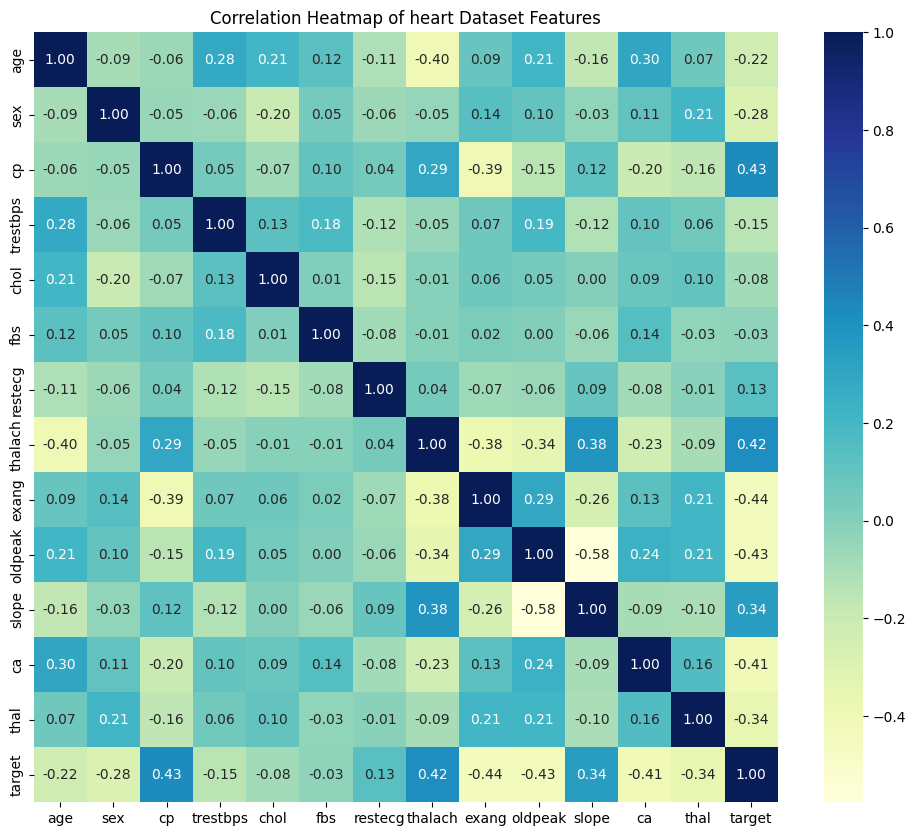

In [12]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt=".2f",cmap="YlGnBu")
plt.title('Correlation Heatmap of heart Dataset Features')
plt.show()

##Inferences from the correlation heat map:
The darkest shows positive correaltion will the lighest shows negative correaltion.


1.   cp as a feature is has the highest (+ve) correlation 0.432080

2.  exang as a feature has the highest (-ve) correlation -0.435601



##Outliers

In [13]:
import pandas as pd

# Define a function to list outliers for each feature
def list_outliers(df):
    # Create an empty list to store outlier counts
    outlier_counts = []
    # Find and print outliers for each feature
    for column in df.columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Find outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        # Count outliers and add to the list
        outlier_counts.append({'Feature': column, 'Outlier Count': outliers.shape[0]})
    # Convert the list to a DataFrame
    outlier_counts_df = pd.DataFrame(outlier_counts)
    # Print outlier counts in tabular format
    print(outlier_counts_df)

# Call the function with your dataset
list_outliers(heart_dataset)


     Feature  Outlier Count
0        age              0
1        sex              0
2         cp              0
3   trestbps              9
4       chol              5
5        fbs             45
6    restecg              0
7    thalach              1
8      exang              0
9    oldpeak              5
10     slope              0
11        ca             24
12      thal              2
13    target              0


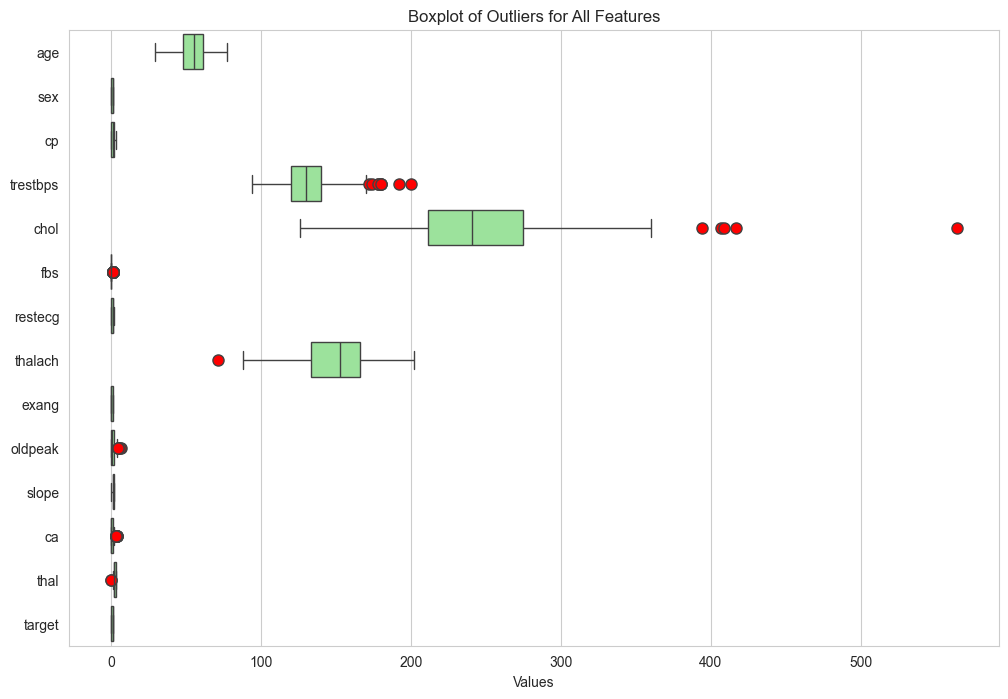

In [14]:
# Set the style
sns.set_style("whitegrid")

# Plot boxplots for all features
plt.figure(figsize=(12, 8))
sns.boxplot(data=heart_dataset, orient="h", color='#90EE90', flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.title('Boxplot of Outliers for All Features')
plt.xlabel('Values')
plt.show()


In [15]:
def remove_outliers_except(df, exceptions):
    cleaned_df = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
    # Iterate over columns and remove outliers, except for specified columns
    for column in df.columns:
        if column not in exceptions and df[column].dtype != 'object':  # Exclude specified columns and non-numeric columns
            Q1 = cleaned_df[column].quantile(0.25)
            Q3 = cleaned_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove outliers
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

# Specify exceptions
exceptions = ['trestbps', 'chol','fbs','ca']

# Call the function with your dataset
heart_dataset_cleaned = remove_outliers_except(heart_dataset, exceptions)
print(heart_dataset_cleaned.shape)


(294, 14)


### separating the data and labels


In [16]:
X = heart_dataset_cleaned.drop(columns = ['target'], axis=1)
Y = heart_dataset_cleaned['target']

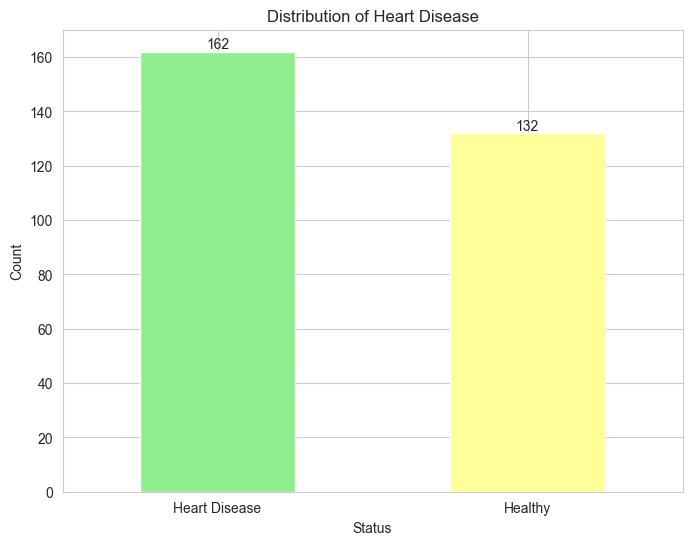

In [17]:
#bar chart of status
Y_counts = Y.value_counts().rename({1: "Heart Disease", 0: "Healthy"})

# Plotting the bar plot with labeled bars and counts
ax = Y_counts.plot(kind='bar', figsize=(8, 6), color=['#90EE90', '#FFFF99'])
for i, count in enumerate(Y_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')
plt.xticks(rotation=0)
plt.show()


In [18]:
Y.value_counts()

target
1    162
0    132
Name: count, dtype: int64

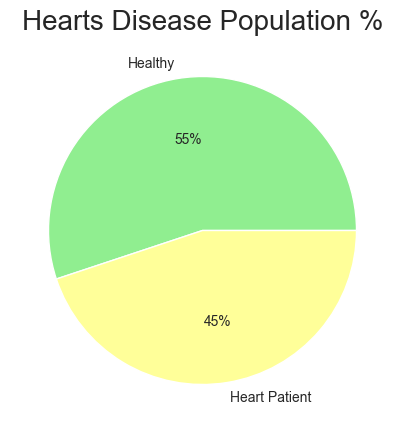

In [19]:
# Calculate % of the count of each class in the 'status' column
heart_count = Y.value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 5))
plt.pie(heart_count, labels=['Healthy', 'Heart Patient'], colors=['#90EE90', '#FFFF99'], autopct='%0.0f%%')
plt.title('Hearts Disease Population %', fontsize=20)
plt.show()


In [20]:
#mean of each feature for patients with and without heart disease
heart_dataset_cleaned.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.560606,0.825758,0.500000,134.431818,251.606061,0.159091,0.424242,139.780303,0.553030,1.487879,1.196970,1.151515,2.568182
1,52.543210,0.561728,1.358025,128.956790,242.635802,0.141975,0.598765,158.728395,0.141975,0.567901,1.598765,0.345679,2.129630


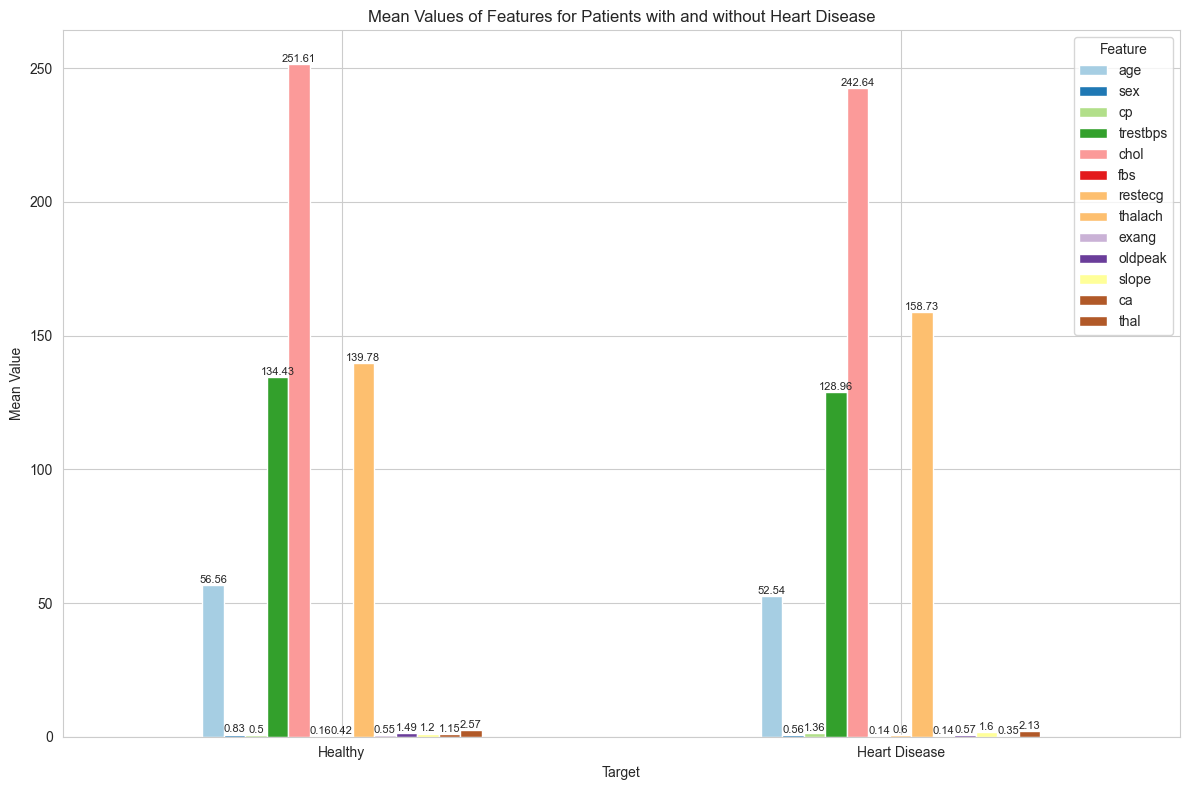

In [21]:
# Grouping by 'target' and calculating the mean for each feature
mean_by_target = heart_dataset_cleaned.groupby('target').mean()

# Plotting the mean values for each feature
ax = mean_by_target.plot(kind='bar', figsize=(12, 8), cmap='Paired')
# Loop through each bar in the plot
for bar in ax.patches:
    # Calculate the x-coordinate for the text (center of the bar)
    text_x = bar.get_x() + bar.get_width() / 2
    # Calculate the y-coordinate for the text (above the top of the bar, slightly)
    text_y = bar.get_height() + 0.02
    # Retrieve the height of the bar (mean value of the feature)
    bar_height = round(bar.get_height(), 2)
    # Add the text at the calculated position
    ax.text(text_x, text_y, bar_height, ha='center', va='bottom', fontsize=8)
# Adding title and labels to axes
plt.title('Mean Values of Features for Patients with and without Heart Disease')
plt.xlabel('Target')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Healthy', 'Heart Disease'], rotation=0)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

##Train Test Split

In [22]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,stratify=Y,random_state=42)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(294, 13) (235, 13) (59, 13)


In [24]:
#Train logistic model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)

C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
Y_pred1 = model1.predict(X_test)
Y_pred1

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [26]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model1.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


The person is healthy


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 87.66%


In [28]:
# accuracy score on the test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 83.05%


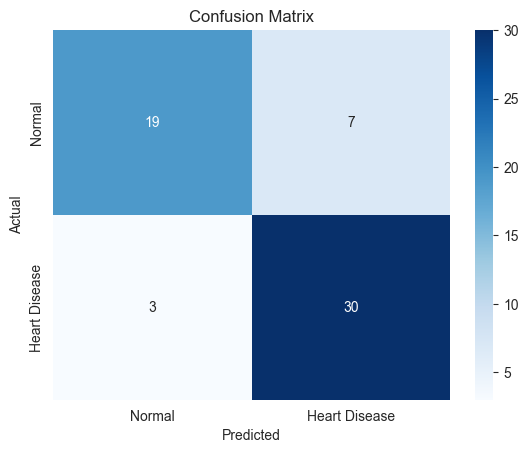

In [29]:
cm = metrics.confusion_matrix(Y_test, Y_pred1)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        26
           1       0.81      0.91      0.86        33

    accuracy                           0.83        59
   macro avg       0.84      0.82      0.82        59
weighted avg       0.83      0.83      0.83        59



### SVM

In [31]:
#Train SVM model
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [32]:
Y_pred2 = model2.predict(X_test)
Y_pred2

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [33]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model2.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


The person is healthy


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [34]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 87.23%


In [35]:
# accuracy score on the test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 84.75%


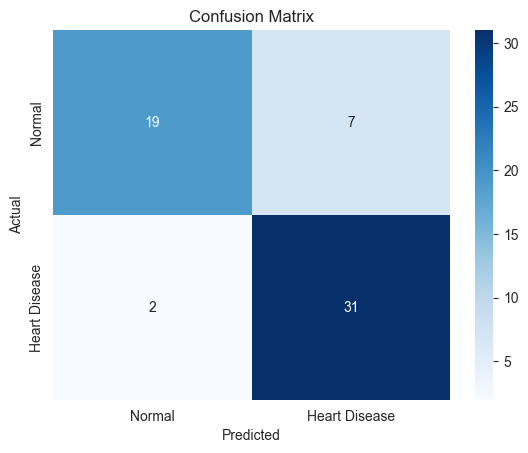

In [36]:
cm = metrics.confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [37]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.82      0.94      0.87        33

    accuracy                           0.85        59
   macro avg       0.86      0.84      0.84        59
weighted avg       0.85      0.85      0.84        59



### KNN

In [38]:
k_values = np.arange(1, 22,2)  # Example range: from 1 to 20
print(k_values)
# Define an empty list to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation for each k value
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)  # 5-fold cross-validation
    print(scores)
    cv_scores.append(scores.mean())

[ 1  3  5  7  9 11 13 15 17 19 21]
[0.55319149 0.70212766 0.57446809 0.5106383  0.65957447]
[0.65957447 0.70212766 0.59574468 0.53191489 0.65957447]
[0.70212766 0.70212766 0.61702128 0.57446809 0.78723404]
[0.63829787 0.72340426 0.63829787 0.55319149 0.76595745]
[0.72340426 0.76595745 0.61702128 0.59574468 0.68085106]
[0.72340426 0.72340426 0.61702128 0.57446809 0.65957447]
[0.70212766 0.74468085 0.65957447 0.53191489 0.63829787]
[0.72340426 0.72340426 0.63829787 0.53191489 0.68085106]
[0.74468085 0.76595745 0.70212766 0.4893617  0.72340426]
[0.74468085 0.72340426 0.68085106 0.4893617  0.72340426]
[0.76595745 0.72340426 0.65957447 0.4893617  0.72340426]


In [39]:
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal value of k:", optimal_k)

Optimal value of k: 17


In [40]:
# Train KNN model
model3= KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski',p=2)
model3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

In [41]:
Y_pred3 = model3.predict(X_test)
Y_pred3

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model3.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


The person is healthy


C:\Users\Stemy\anaconda3\envs\myenv_1\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [43]:
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

Accuracy score of the training data: 70.21%


In [44]:
# accuracy score on the test data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

Accuracy score of the test data: 62.71%


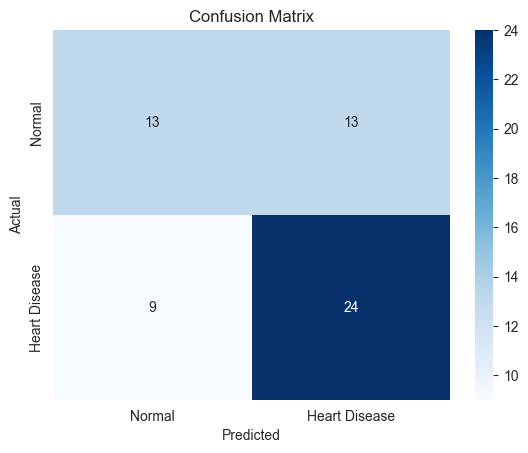

In [45]:
cm = metrics.confusion_matrix(Y_test, Y_pred3)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [46]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54        26
           1       0.65      0.73      0.69        33

    accuracy                           0.63        59
   macro avg       0.62      0.61      0.61        59
weighted avg       0.62      0.63      0.62        59



### Random Forest

In [47]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': range(3,12),
	'max_leaf_nodes': range(3,12),
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_)

In [ ]:
randomized_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, Y_train)
print(randomized_search.best_estimator_)

In [ ]:
# Train Random Forest model
model4= RandomForestClassifier(n_estimators= 25,max_features='log2', max_leaf_nodes=3,max_depth=8, criterion="gini")
model4.fit(X_train, Y_train)

In [ ]:
Y_pred4 = model4.predict(X_test)
Y_pred4

In [ ]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model4.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


In [ ]:
X_train_prediction = model4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred4)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction))

### Gradient Boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model5, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Create a Gradient Boosting classifier with default 'deviance' loss
model5 = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,ccp_alpha=0.0)

# Train the model with training data
model5.fit(X_train, Y_train)

In [ ]:
Y_pred5 = model5.predict(X_test)
Y_pred5

In [ ]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model5.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


In [ ]:
X_train_prediction = model5.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred5)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction))

### XG Boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]

}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model6, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
model6 = xgb.XGBClassifier(learning_rate= 1,max_depth= 3,n_estimators=50)
# Train the model with training data
model6.fit(X_train, Y_train)

In [ ]:
Y_pred6 = model6.predict(X_test)
Y_pred6

In [ ]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model1.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


In [ ]:
X_train_prediction = model6.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model6.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
cm = metrics.confusion_matrix(Y_test, Y_pred6)
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test, X_test_prediction))

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model7, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

In [ ]:
model7 = AdaBoostClassifier(n_estimators=200,learning_rate=0.01)
# Train the model with training data
model7.fit(X_train, Y_train)

In [ ]:
Y_pred7 = model7.predict(X_test)
Y_pred7

In [ ]:
input_data=[[47,1,1.46,193,347,0.08,1.21,111,0.025,4.1,1.49,2,2.91]]

prediction=model1.predict(input_data)
if (prediction[0] == 0):
  print('The person is healthy')
else:
  print('The person has heart disease')


In [ ]:
X_train_prediction = model7.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(training_data_accuracy)

print(f'Accuracy score of the training data: {formatted_accuracy}')

In [ ]:
# accuracy score on the test data
X_test_prediction = model7.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the test data: {formatted_accuracy}')

In [ ]:
# filename = 'diabetes_model.sav'
#taking Gradient boosting model
pickle.dump(model5, open('Heart.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('Heart.pkl', 'rb'))